In [366]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Dropout, Input
from tensorflow.keras.utils import to_categorical, pad_sequences
from tensorflow.keras.applications.vgg16 import VGG16

In [367]:
file_path = '/home/bteam/work/data/PetImages'
dog_path = file_path+'/Dog/'
cat_path = file_path+'/Cat/'

In [368]:
dog_file_list = glob(dog_path+'*.jpg')
cat_file_list = glob(cat_path+'*.jpg')

In [369]:
len(dog_file_list)

12500

In [154]:
# plt.imread(img_name) ==> numpy.array

In [297]:
plt.imread(dog_file_list[10]).shape

(366, 225, 3)

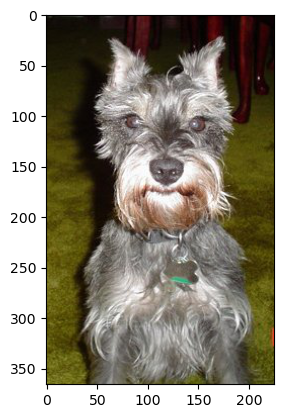

In [298]:
plt.imshow(plt.imread(dog_file_list[10]))

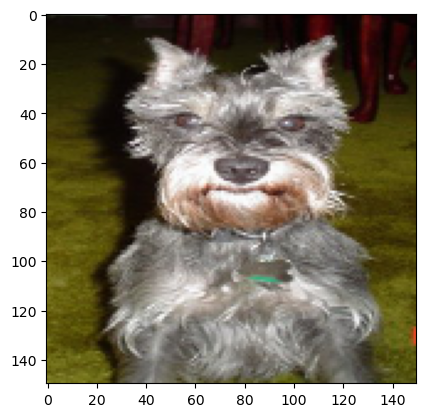

In [299]:
plt.imshow(cv2.resize(plt.imread(dog_file_list[10]),(150,150)))

In [300]:
l = []
for dogfile in dog_file_list:
    try:
        x = plt.imread(dogfile)
        l.append(x.shape[-1])
    except:
        pass

/home/bteam/anaconda3/envs/bteam/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [301]:
np.unique(np.array(l), return_counts=True)

(array([  3,   4, 217, 268]), array([12461,    36,     1,     1]))

In [370]:
images = np.zeros((1000, 150, 150, 3))
for idx, dogfile in enumerate(dog_file_list[:500]):
    try:
        x = plt.imread(dogfile)
        if x.shape[-1] > 3 :
            x = x[:,:,:3]
        img = cv2.resize(x,(150,150))
        images[idx] = img
    except:
        pass        
    

for idx, catfile in enumerate(cat_file_list[:500]):
    try:
        x = plt.imread(catfile)
        if x.shape[-1] > 3 :
            x = x[:,:,:3]
        img = cv2.resize(x,(150,150))
        images[idx+500] = img
    except:
        pass            

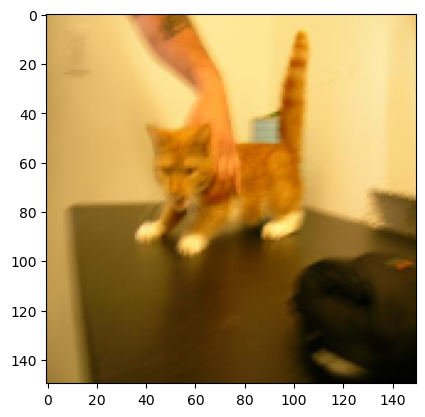

In [303]:
plt.imshow(images[500].astype(np.uint8))

In [304]:
y = np.concatenate([np.zeros(500), np.ones(500)])

In [371]:
X_train, X_test, y_train, y_test = train_test_split(images, y)

In [372]:
X_train = X_train/255.
X_test = X_test/255.

In [373]:
X_train.shape

(750, 150, 150, 3)

In [308]:
model_1 = Sequential(
    [
        Flatten(input_shape=(150,150,3)),
        Dense(256),
        Activation('relu'),
        BatchNormalization(),
        Dense(128),
        Activation('relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1),
        Activation('sigmoid')
    ]
)

In [374]:
opt = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']
model_1.compile(optimizer=opt, loss=loss, metrics=metrics)

In [114]:
model_1.fit(X_train,y_train, epochs=10, batch_size=32)

Epoch 1/10
24/24 [==============================] - 5s 163ms/step - loss: 0.8441 - accuracy: 0.2800
Epoch 2/10
24/24 [==============================] - 4s 164ms/step - loss: 0.6827 - accuracy: 0.3213
Epoch 3/10
24/24 [==============================] - 4s 165ms/step - loss: 0.5318 - accuracy: 0.3773
Epoch 4/10
24/24 [==============================] - 4s 169ms/step - loss: 0.4516 - accuracy: 0.4107
Epoch 5/10
24/24 [==============================] - 4s 165ms/step - loss: 0.3510 - accuracy: 0.4560
Epoch 6/10
24/24 [==============================] - 4s 164ms/step - loss: 0.3278 - accuracy: 0.4613
Epoch 7/10
24/24 [==============================] - 4s 164ms/step - loss: 0.2505 - accuracy: 0.4867
Epoch 8/10
24/24 [==============================] - 4s 166ms/step - loss: 0.2078 - accuracy: 0.4920
Epoch 9/10
24/24 [==============================] - 4s 165ms/step - loss: 0.1661 - accuracy: 0.4960
Epoch 10/10
24/24 [==============================] - 4s 163ms/step - loss: 0.1375 - accuracy: 0.4960

In [115]:
model_1.evaluate(X_test, y_test)

8/8 [==============================] - 0s 15ms/step - loss: 453.9653 - accuracy: 0.4720


[453.9653015136719, 0.47200000286102295]

In [310]:
input_ = Input(shape=(150, 150, 3))
x = Conv2D(32,3,1, padding='same')(input_)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(32,3,2, padding='same')(x)
x = LeakyReLU()(x)
x = Conv2D(64,3,1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(64,3,2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling2D(3)(x)
x = Flatten()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = Dense(1)(x)
out = Activation('sigmoid')(x)
model_2 = Model(input_, out)

In [311]:
model_2.compile(optimizer=opt, loss=loss, metrics=metrics)

In [118]:
model_2.fit(X_train,y_train, epochs=10, batch_size=32)

Epoch 1/10
24/24 [==============================] - 18s 692ms/step - loss: 0.7100 - accuracy: 0.3320
Epoch 2/10
24/24 [==============================] - 17s 693ms/step - loss: 0.4800 - accuracy: 0.4867
Epoch 3/10
24/24 [==============================] - 17s 707ms/step - loss: 0.3368 - accuracy: 0.5080
Epoch 4/10
24/24 [==============================] - 17s 716ms/step - loss: 0.2175 - accuracy: 0.5107
Epoch 5/10
24/24 [==============================] - 17s 709ms/step - loss: 0.1364 - accuracy: 0.5107
Epoch 6/10
24/24 [==============================] - 17s 718ms/step - loss: 0.0882 - accuracy: 0.5107
Epoch 7/10
24/24 [==============================] - 17s 722ms/step - loss: 0.0611 - accuracy: 0.5107
Epoch 8/10
24/24 [==============================] - 18s 738ms/step - loss: 0.0455 - accuracy: 0.5107
Epoch 9/10
24/24 [==============================] - 17s 708ms/step - loss: 0.0360 - accuracy: 0.5107
Epoch 10/10
24/24 [==============================] - 17s 697ms/step - loss: 0.0299 - accura

In [312]:
def cat_dog_predict(x):
    pred = np.where(model_2.predict(x)[0][0] > 0.5, '고양이', '강아지')
    print(f'예측한 결과는 {pred} {model_2.predict(x)[0][0]} 입니다')
    x = (x.reshape(150,150,3)*255).astype('int')
    plt.imshow(x)
    plt.show()

1/1 [==============================] - 0s 26ms/step
예측한 결과는 강아지 0.47146323323249817 입니다


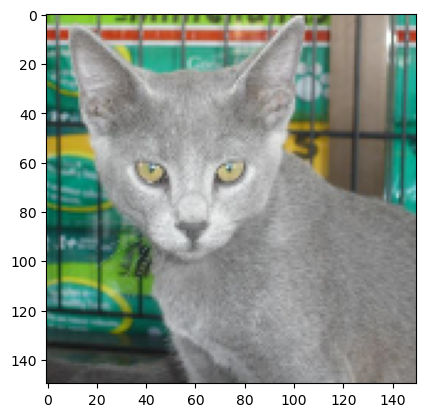

In [190]:
cat_dog_predict(X_train[[100]])

In [127]:
model_2.evaluate(X_test, y_test)

8/8 [==============================] - 1s 156ms/step - loss: 35.8185 - accuracy: 0.4680


[35.818538665771484, 0.46799999475479126]

In [313]:
pre_trained_model = VGG16(include_top=False,input_shape=(150,150,3))

In [192]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [193]:
# VGG16??

In [319]:
a = pre_trained_model.predict(X_train)

24/24 [==============================] - 50s 2s/step


In [320]:
a.shape

(750, 4, 4, 512)

In [ ]:
model_3 = Sequential(
    [Flatten(input_shape=(4,4,512)),
    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
    ]
)

In [382]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [323]:
model_3.fit(a, y_train, epochs=30)

Epoch 1/30
24/24 [==============================] - 1s 21ms/step - loss: 0.5192 - accuracy: 0.8093
Epoch 2/30
24/24 [==============================] - 1s 22ms/step - loss: 0.1364 - accuracy: 0.9520
Epoch 3/30
24/24 [==============================] - 0s 20ms/step - loss: 0.0789 - accuracy: 0.9720
Epoch 4/30
24/24 [==============================] - 1s 23ms/step - loss: 0.0539 - accuracy: 0.9880
Epoch 5/30
24/24 [==============================] - 1s 22ms/step - loss: 0.0473 - accuracy: 0.9840
Epoch 6/30
24/24 [==============================] - 1s 21ms/step - loss: 0.0204 - accuracy: 0.9987
Epoch 7/30
24/24 [==============================] - 1s 21ms/step - loss: 0.0163 - accuracy: 0.9987
Epoch 8/30
24/24 [==============================] - 1s 21ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 9/30
24/24 [==============================] - 1s 21ms/step - loss: 0.0103 - accuracy: 0.9973
Epoch 10/30
24/24 [==============================] - 1s 22ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 11/

In [324]:
model_3.evaluate(a, y_train)

24/24 [==============================] - 0s 3ms/step - loss: 8.0095e-04 - accuracy: 1.0000


[0.0008009482407942414, 1.0]

In [384]:
b = pre_trained_model.predict(X_test)

8/8 [==============================] - 17s 2s/step


In [385]:
model_3.evaluate(b, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.9535 - accuracy: 0.5000


[0.9535022974014282, 0.5]

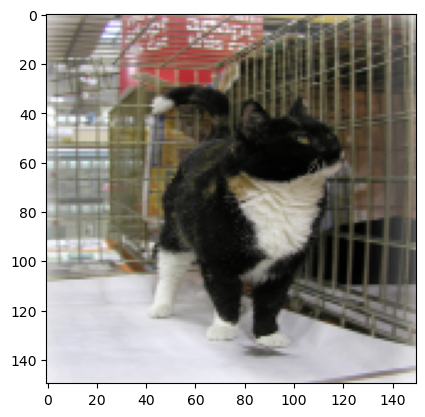

In [388]:
plt.imshow((X_test[0]*255).astype('int'))

In [389]:
x = pre_trained_model.predict(X_test[[0]])

1/1 [==============================] - 0s 92ms/step


In [390]:
model_3.predict(x)

1/1 [==============================] - 0s 56ms/step


array([[0.82829744]], dtype=float32)

In [397]:
img = plt.imread('4.jpg')

In [398]:
img = cv2.resize(img,(150,150))

In [399]:
img = img[:,:,:3]

In [400]:
img = img.reshape(1,150,150,3)

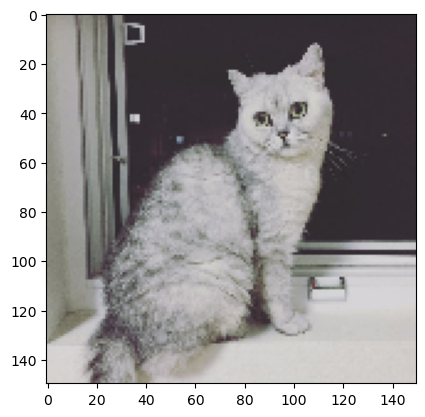

In [284]:
plt.imshow(img)

In [285]:
img = pre_trained_model.predict(img.reshape(-1,150,150,3))

1/1 [==============================] - 0s 90ms/step


In [258]:
model_3.predict(img)

1/1 [==============================] - 0s 55ms/step


array([[1.]], dtype=float32)

In [219]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [271]:
pre_trained_model.get_config()['layers'][1]['config']

{'name': 'block1_conv1',
 'trainable': True,
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [272]:
x = pre_trained_model.get_config()['layers'][1]['config']

In [273]:
x = dict(x)

In [274]:
conv = Conv2D(**x)

In [260]:
fc1 = Dense(128, activation='relu', input_shape=(784,))
fc2 = Dense(64, activation='relu')
fc3 = Dense(10, activation='softmax')

In [330]:
model = Sequential([fc1, fc2, fc3])

In [347]:
model.layers

In [348]:
xx = pre_trained_model.layers.copy()

In [349]:
xx.extend(model_3.layers)

In [350]:
final_model = Sequential(xx)

In [351]:
final_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)     

In [352]:
final_model.predict(img)

1/1 [==============================] - 0s 199ms/step


array([[0.]], dtype=float32)

In [353]:
final_model.save('model_5.h5')

In [354]:
model = load_model('model_5.h5')

In [355]:
model.predict(img)

1/1 [==============================] - 0s 204ms/step


array([[0.]], dtype=float32)

In [356]:
from tensorflow.keras import applications

In [393]:
final_model.save('model_6.h6')

INFO:tensorflow:Assets written to: model_6.h6/assets


INFO:tensorflow:Assets written to: model_6.h6/assets


In [394]:
model2 = load_model('model_6.h6')

In [401]:
model2.predict(img)

1/1 [==============================] - 0s 212ms/step


array([[0.]], dtype=float32)